## Pokemon Dataset exploration
### The goal is to demonstrate basic pandas functionality with a simple dataset, and then perhaps create a function to 
### generate a team of six pokemon that is well balanced by type and stats.

In [1]:
import pandas as pd
import numpy as np
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")


# Basic Pandas Functionality: 

### Let's start by getting the data into our .ipynb notebook. To do this I saved a csv titles "pokemon_data.csv" into the same folder that this notebook is running. Create a variable with that file directory in it so we don't have to write it all out, and so that if the file location canges the code still works 

In [2]:
cwd = os.getcwd()
df = pd.read_csv(cwd + '/pokemon_data.csv')
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [3]:
# Let's get the basic statistical information from the dataset.
df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [4]:
# I'm going to want to compare mons not only on their individual stats, but the sum of their stats. We make a column
# to calculate that
df['Total_Stats'] = df.iloc[:,4:10].sum(axis=1)
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total_Stats
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309


In [5]:
# It would make more sense visually to have that stat total column beside all the other attribute numbers
# To do this, make a list of the columns, then we can manually change the order as in the second line.
cols = list(df.columns.values)

df = df[cols[0:10] + [cols[-1]] + cols[10:12]]
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total_Stats,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,525,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,625,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,309,1,False


# Making changes to the dataframe
### Good practice when making serious changes to a dataframe is to make a copy of the data, and then work with that copy. You should do this because if/when you make a mistake in your code, you will want a clean copy of the original data to revert back to. This is good pratice for things like excel files you're cleaning up, or anything else your making changes to.

In [6]:
df_copy = df.copy()
# This next line is to remove all mega evolutions and legendaries from the dataframe, as most highest stated pokemon will be one of 
# these two and those teams will get boring
df_copy = df_copy[((df_copy['Legendary'] == False) & (~df_copy['Name'].str.contains("Mega")))]
df_copy.replace(np.nan, 'None', inplace = True)

# Let's find out the number of unique type combinations in the game
# The two types for each pokemon can be a little misleading. For example, there is no functional difference between
# a fire-fighting vs. a fighting-fire. Changing the typings to a set, and then counting them will remove these duplicates.

df_copy.loc[df_copy['Type 2']!="None", 'Full Type'] = df_copy[['Type 1', 'Type 2']].apply(set, axis=1)
df_copy.loc[df_copy['Type 2'].str.contains("None", case=False), 'Full Type'] = df_copy.apply(lambda x: set([x['Type 1']]), axis=1)
cols = list(df_copy.columns.values)
df_copy = df_copy[cols[0:2] + [cols[-1]] + cols[2:12]]
df_copy['Full Type'] = df_copy['Full Type'].astype(str)
df_copy.head(10)


,#,Name,Full Type,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total_Stats,Generation
0,1,Bulbasaur,"{'Grass', 'Poison'}",Grass,Poison,45,49,49,65,65,45,318,1
1,2,Ivysaur,"{'Grass', 'Poison'}",Grass,Poison,60,62,63,80,80,60,405,1
2,3,Venusaur,"{'Grass', 'Poison'}",Grass,Poison,80,82,83,100,100,80,525,1
4,4,Charmander,{'Fire'},Fire,None,39,52,43,60,50,65,309,1
5,5,Charmeleon,{'Fire'},Fire,None,58,64,58,80,65,80,405,1
6,6,Charizard,"{'Flying', 'Fire'}",Fire,Flying,78,84,78,109,85,100,534,1
9,7,Squirtle,{'Water'},Water,None,44,48,65,50,64,43,314,1
10,8,Wartortle,{'Water'},Water,None,59,63,80,65,80,58,405,1
11,9,Blastoise,{'Water'},Water,None,79,83,100,85,105,78,530,1
13,10,Caterpie,{'Bug'},Bug,None,45,30,35,20,20,45,195,1


In [7]:
# Let's get a list of all the types a pokemon can be
types = df_copy['Type 1'].unique()

# Sort Valus in the data by Total_stats, group them together by primary type, and only keep the top 3
best_by_type= df_copy.sort_values('Total_Stats',ascending = False).groupby('Type 1').head(10)
best_by_type.sort_values(by = 'Type 1', ascending = True, inplace = True)
best_by_type




,#,Name,Full Type,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total_Stats,Generation
231,214,Heracross,"{'Bug', 'Fighting'}",Bug,Fighting,80,125,75,40,95,85,500,2
132,123,Scyther,"{'Bug', 'Flying'}",Bug,Flying,70,110,80,55,80,105,500,1
650,589,Escavalier,"{'Bug', 'Steel'}",Bug,Steel,70,135,105,60,105,20,495,5
520,469,Yanmega,"{'Bug', 'Flying'}",Bug,Flying,86,76,86,116,56,95,515,4
136,127,Pinsir,{'Bug'},Bug,None,65,125,100,55,70,85,500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,131,Lapras,"{'Ice', 'Water'}",Water,Ice,130,85,80,85,95,60,535,1
282,260,Swampert,"{'Ground', 'Water'}",Water,Ground,100,110,90,85,90,60,535,3
726,658,Greninja,"{'Dark', 'Water'}",Water,Dark,72,95,67,103,71,122,530,6
713,647,KeldeoOrdinary Forme,"{'Fighting', 'Water'}",Water,Fighting,91,72,90,129,90,108,580,5


# Some visulizations of the data using seaborn

In [ ]:
# Dataframes to use: df_copy

### How many pokemon did each generation add?

c:\Users\seanl\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


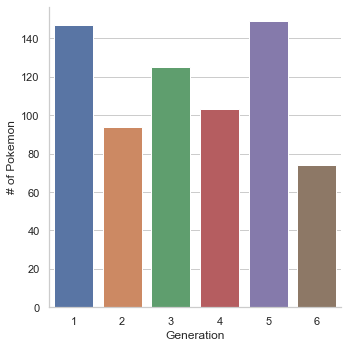

In [8]:
sns.factorplot(
    x='Generation', 
    data=df_copy, 
    kind='count'
).set_axis_labels('Generation', '# of Pokemon');

### How about more specifically, the number of each type in each generation?

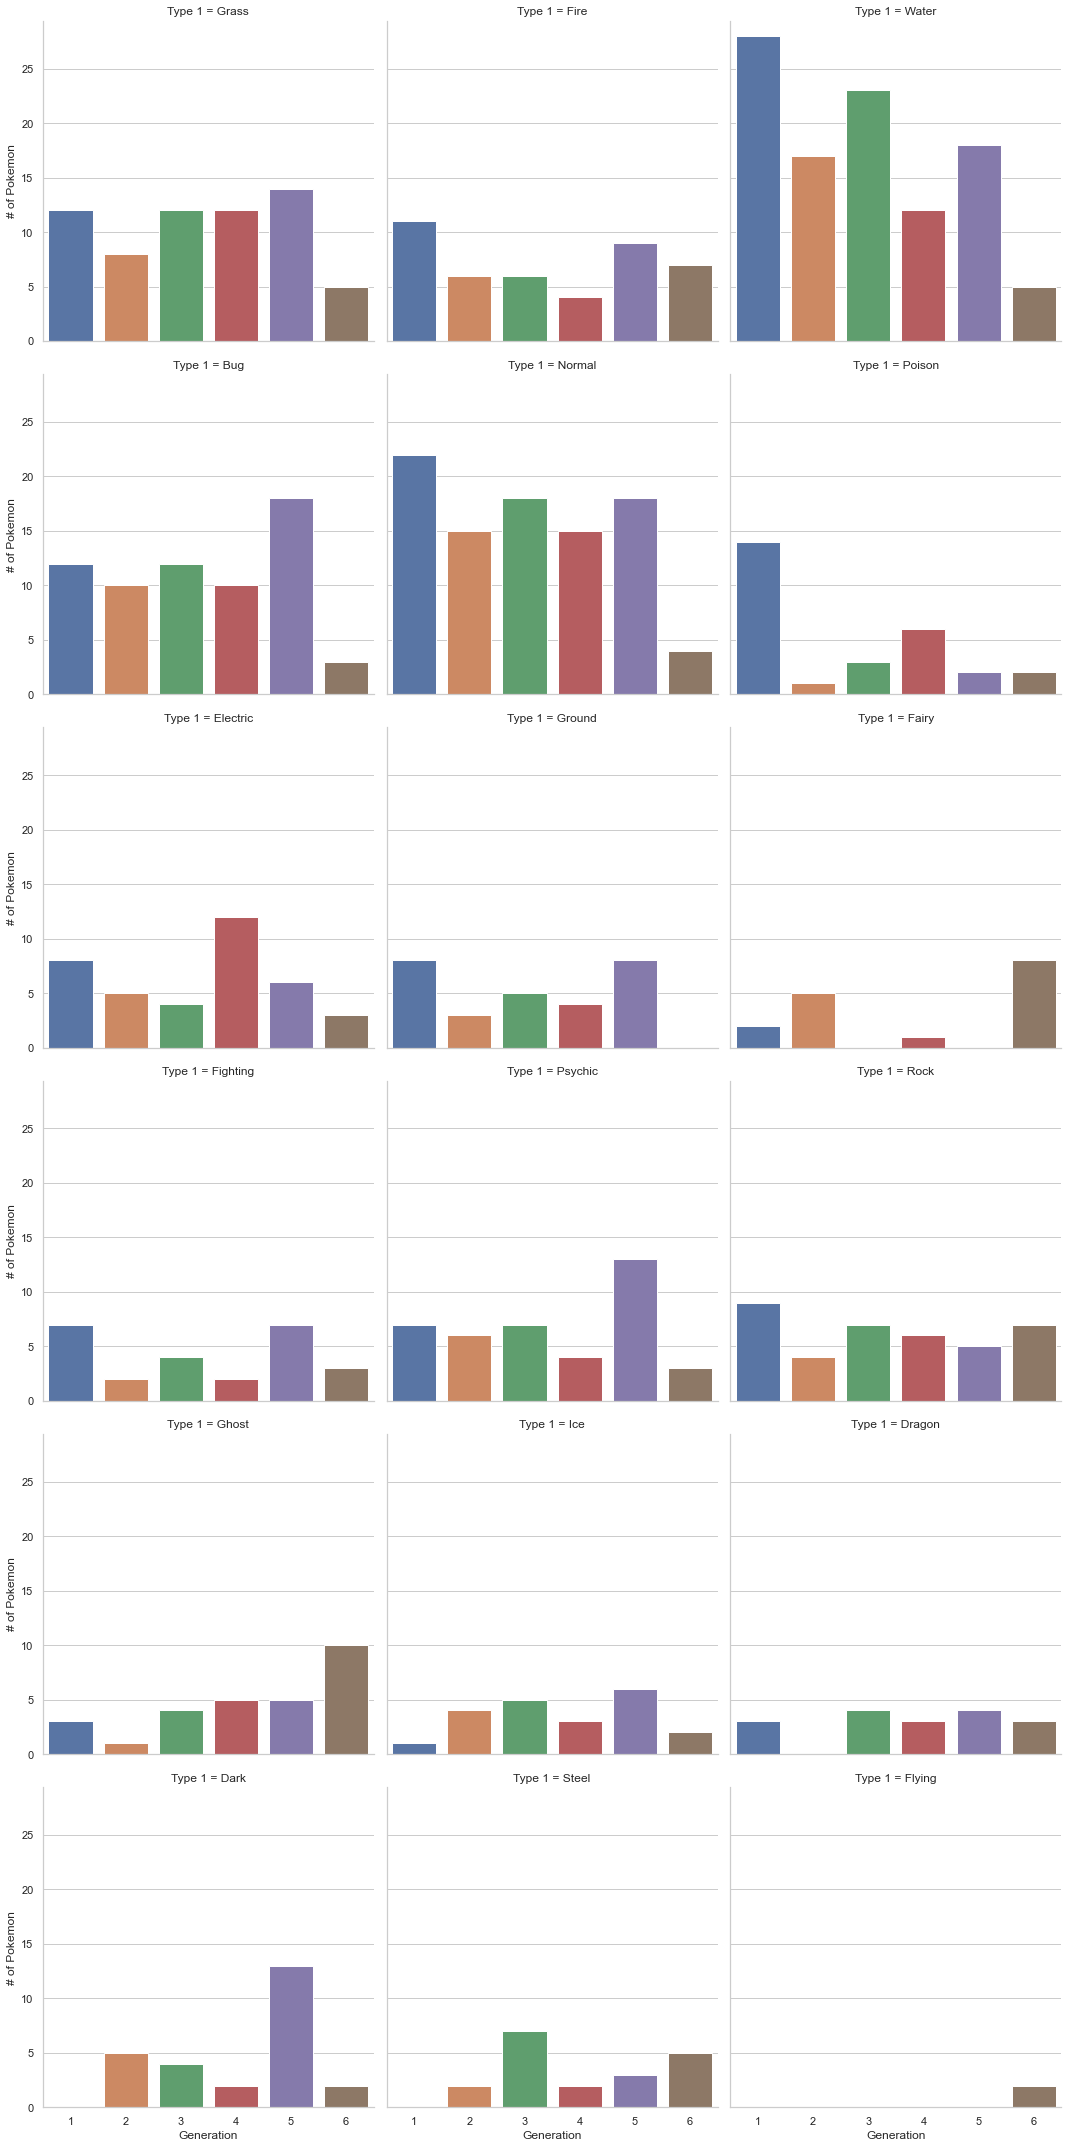

In [9]:
sns.catplot(
    x='Generation',
    data=df_copy,
    col='Type 1',
    kind='count',
    col_wrap=3
).set_axis_labels('Generation', '# of Pokemon');

### And Secondary type?

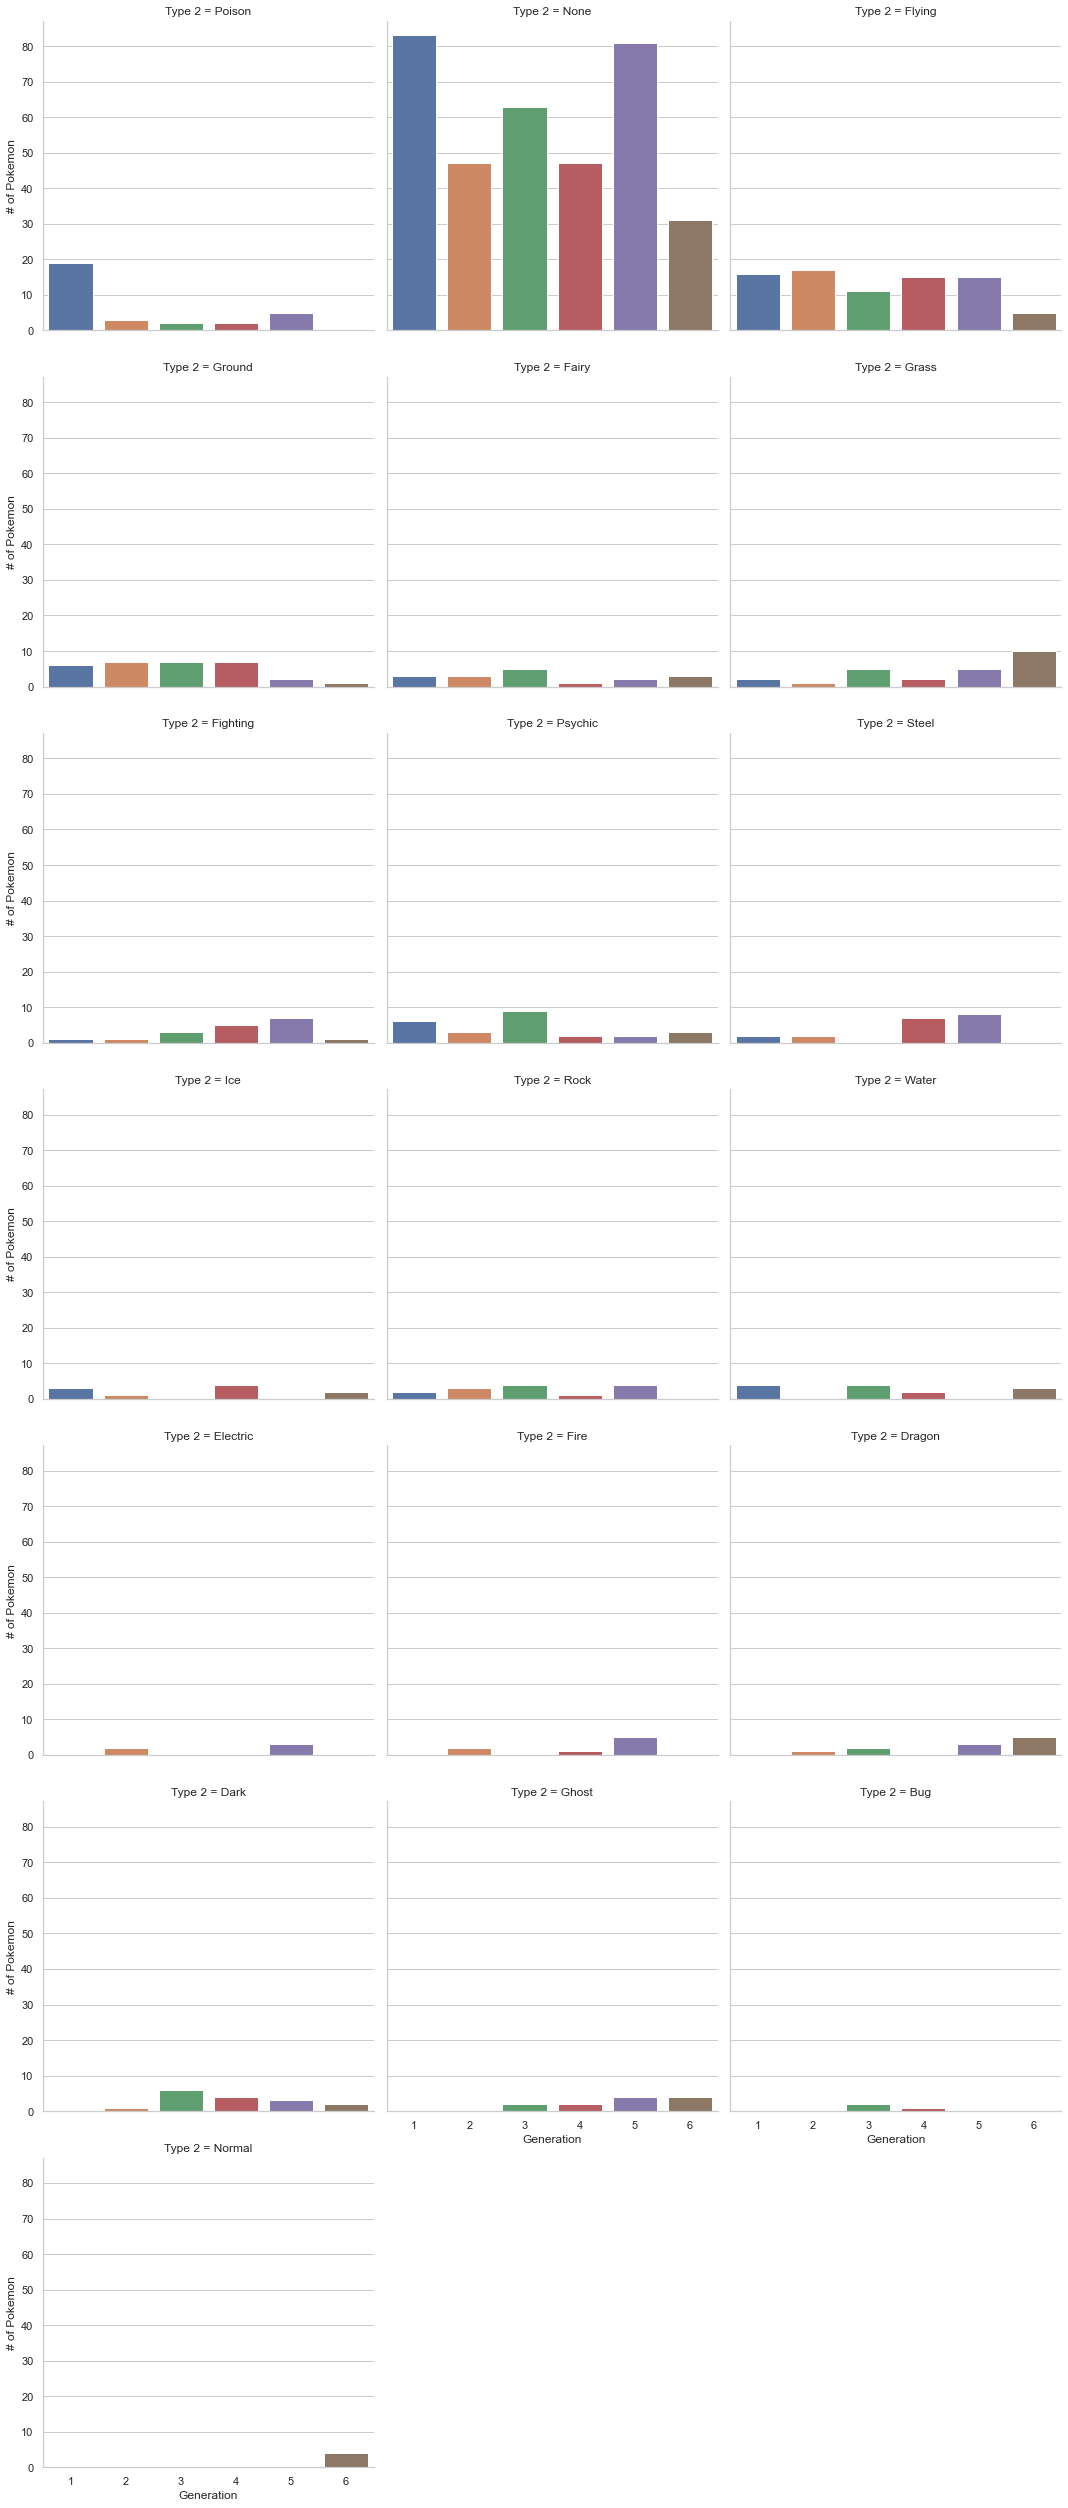

In [10]:
sns.catplot(
    x='Generation',
    data=df_copy,
    col='Type 2',
    kind='count',
    col_wrap=3
).set_axis_labels('Generation', '# of Pokemon');

In [11]:
# Let's make a counts dataframe so we can chart out the different number of type combinations
Counts = df_copy.copy()
# Counts['Full Type'] = Counts['Full Type'].astype(str)
Counts = Counts.groupby(['Full Type']).size().reset_index(name='Total Number')
Counts = Counts.sort_values(by=['Total Number'], ascending = False)
Counts

,Full Type,Total Number
94,{'Normal'},58
119,{'Water'},55
74,{'Grass'},31
100,{'Psychic'},28
43,{'Fire'},27
...,...,...
38,"{'Fighting', 'Normal'}",1
1,"{'Bug', 'Fighting'}",1
47,"{'Flying', 'Fighting'}",1
57,"{'Flying', 'Steel'}",1


Text(0, 0.5, 'Full Type')

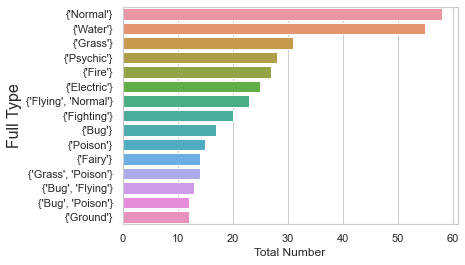

In [12]:
chart = sns.barplot(data=Counts.nlargest(15, 'Total Number'), x="Total Number", y="Full Type")
plt.ylabel('Full Type', fontsize=16)

### Let's see what the most popular dual types in the game are.

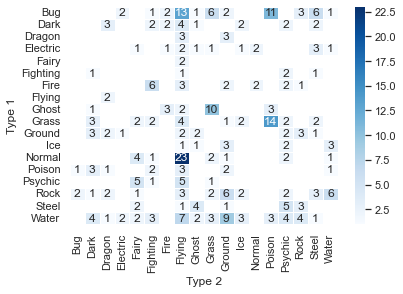

In [13]:
dual_types = df_copy[df_copy['Type 2'] != 'None']

sns.heatmap(
    dual_types.groupby(['Type 1', 'Type 2']).size().unstack(),
    linewidths=1,
    annot=True,
    cmap = "Blues" # I like Blues...
);

### And now for the mons that DON'T have a secondary type

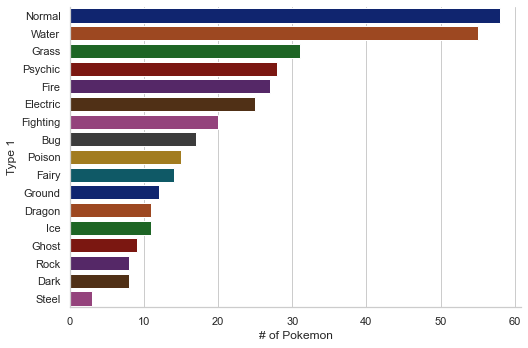

In [14]:
mono_types = df_copy[df_copy['Type 2'] == 'None']

sns.catplot(
    y='Type 1', 
    data=mono_types,
    kind='count',
    order=mono_types['Type 1'].value_counts().index,
    aspect=1.5,
    palette = "dark"
).set_axis_labels('# of Pokemon', 'Type 1');

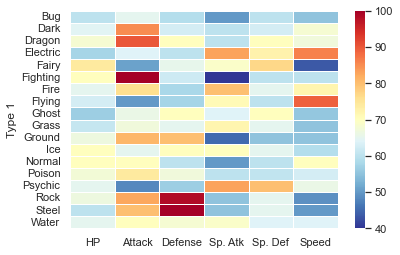

In [15]:
sns.heatmap(
    df_copy.groupby('Type 1').median().loc[:, 'HP':'Speed'], 
    linewidths=1,
    cmap='RdYlBu_r'
);

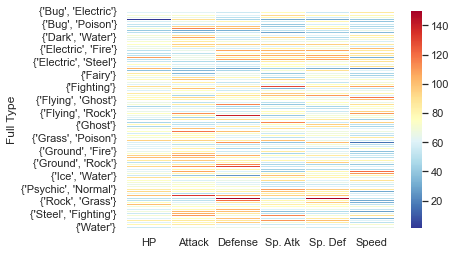

In [16]:
sns.heatmap(
    df_copy.groupby('Full Type').median().loc[:, 'HP':'Speed'], 
    linewidths=1,
    cmap='RdYlBu_r'
);

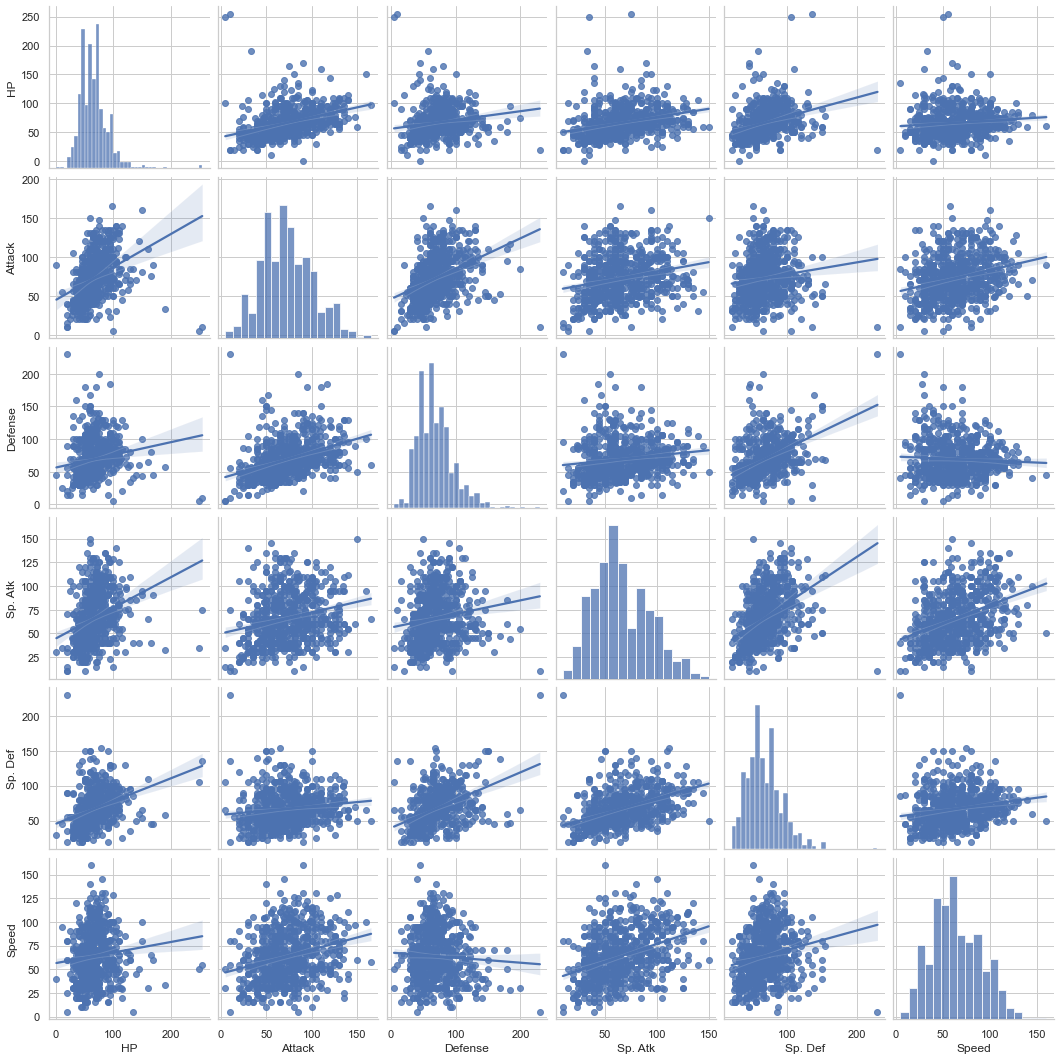

In [17]:
sns.pairplot(
    data=df_copy.loc[:, 'HP':'Speed'],
    kind='reg'
);

# Making a function to generate a random pokemon team

In [18]:
def make_team(size):
    # First, let's make sure we're not making teams that are too big. Maximum pokemon team is 6.
    if size > 6:
        return "Team must be maximum size of 6"
    # Make a temporary dataframe to loop through, since we will be removing pokemon from it based on type.
    # We want a diverse team, so no having multiple grass types, for example
    df_to_loop = best_by_type.copy()
    # And now we make a dataframe for our team. We will be populating this with our final team.
    pokemon_team = pd.DataFrame()
    for i in range(size): # Loop through enough times to get our team size
        # Get a random number that could be any pokemon from our best mons dataframe
        r = random.randint(0, df_to_loop.shape[0])
        # Get that pokemon that the random number selected. 
        temp = df_to_loop.iloc[r]
        type_1 = temp[3]
        type_2 = temp[4]
        # These remove pokemon from our dataframe that have matching types with the pokemon we selected
        df_to_loop = df_to_loop[((df_to_loop['Type 1'] != type_1) & (df_to_loop['Type 2'] != type_1))]
        # We can't include the second check here because it could be 'None', which would eliminate all remaining single type pokemon.
        df_to_loop = df_to_loop[((df_to_loop['Type 1'] != type_2) )]

        # Concate and return to the begining to select the next pokemon
        new_df = pd.DataFrame([temp])
        pokemon_team = pd.concat([pokemon_team, new_df], axis=0, ignore_index=True)
    return pokemon_team
# Things to Add: get input from console if user wants to input a specific pokemon into their team. If they do, make size one 
# smaller, concate the pokemon, remove the types from the table, run the code as normal.

In [22]:
make_team(6)
# To add: Get some data and graphs for the team. Turn it into it's own function that you can call with your random team.

,#,Name,Full Type,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total_Stats,Generation
0,282,Gardevoir,"{'Fairy', 'Psychic'}",Psychic,Fairy,68,65,65,125,115,80,518,3
1,680,Doublade,"{'Steel', 'Ghost'}",Steel,Ghost,59,110,150,45,49,35,448,6
2,112,Rhydon,"{'Ground', 'Rock'}",Ground,Rock,105,130,120,45,45,40,485,1
3,197,Umbreon,{'Dark'},Dark,None,95,65,110,60,130,65,525,2
4,612,Haxorus,{'Dragon'},Dragon,None,76,147,90,60,70,97,540,5
5,648,MeloettaPirouette Forme,"{'Fighting', 'Normal'}",Normal,Fighting,100,128,90,77,77,128,600,5
